In [1]:
import os
from pathlib import Path
import random
from tqdm import tqdm
import cv2
import sys
sys.path.append("../preprocessing")
from pathlib import Path
import matplotlib.pyplot as plt
from img_preprocessing import *

In [2]:
hme_folder = Path("../samples/HME100K")
img_files = [f for f in hme_folder.iterdir() if f.suffix.lower() in [".png",".jpg",".jpeg",".bmp"]]
sample_files = random.sample(img_files, min(20, len(img_files)))
print(f"Loaded {len(sample_files)} sample images.")


Loaded 5 sample images.


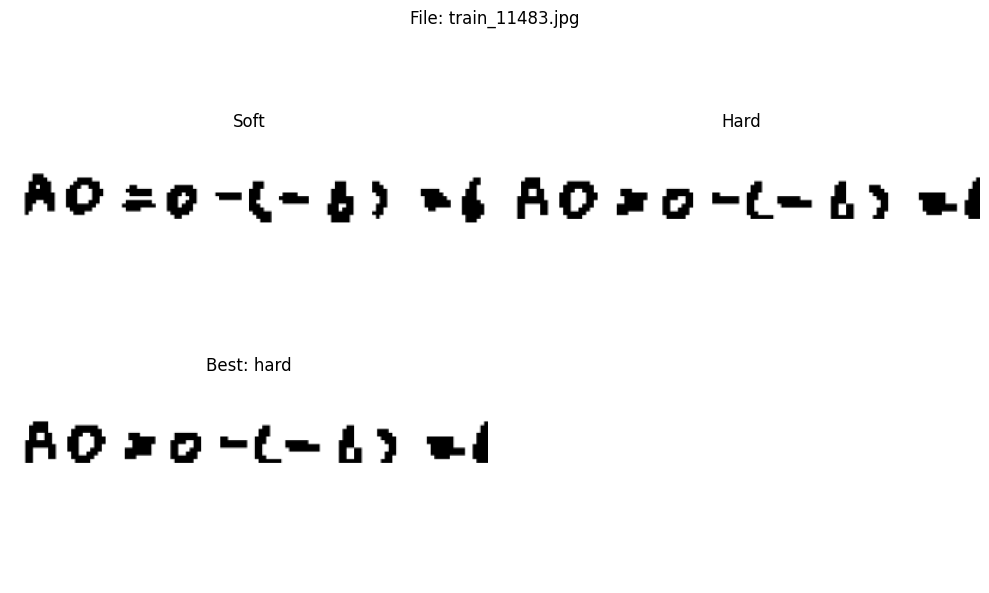

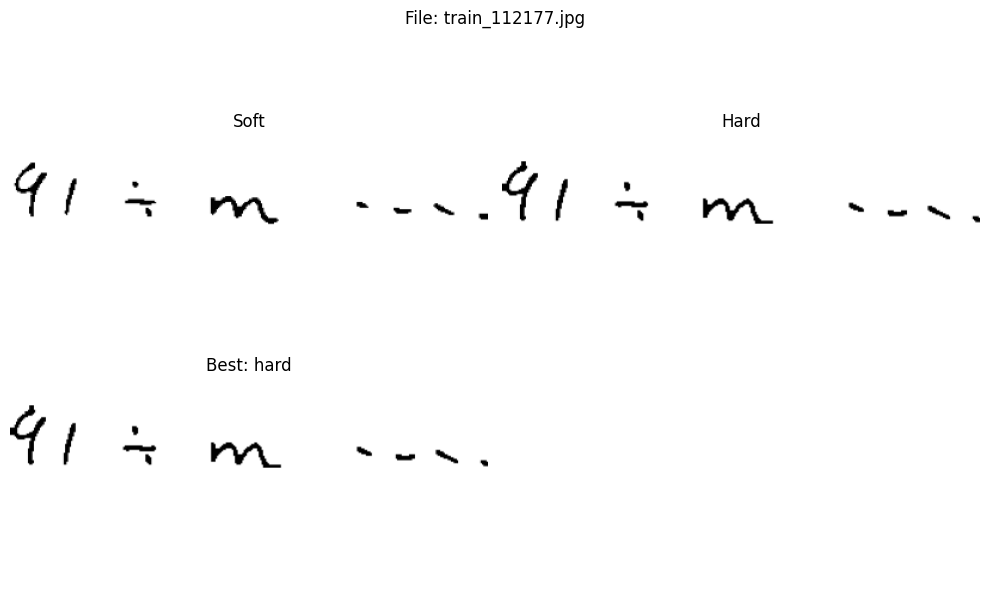

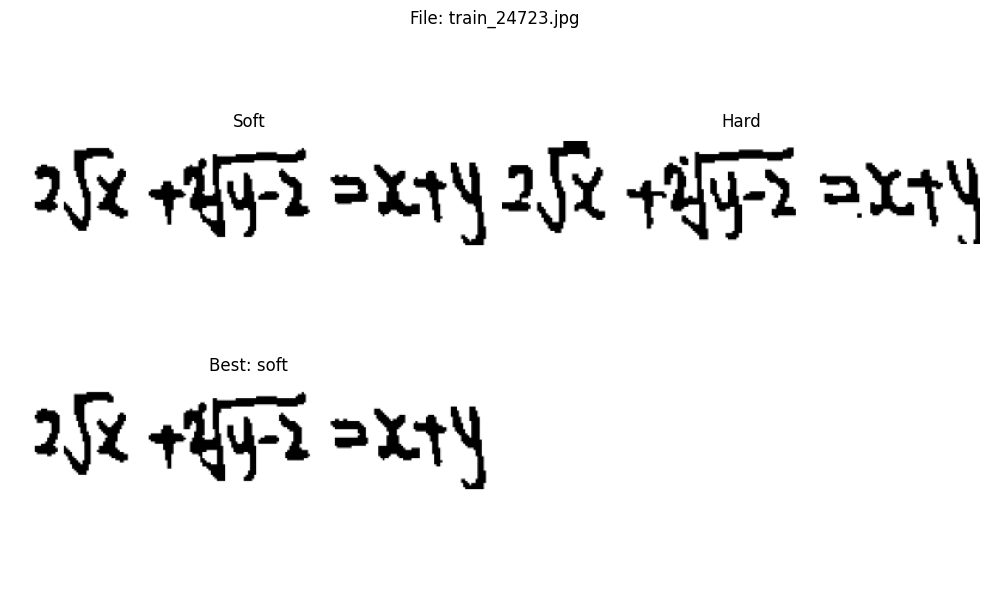

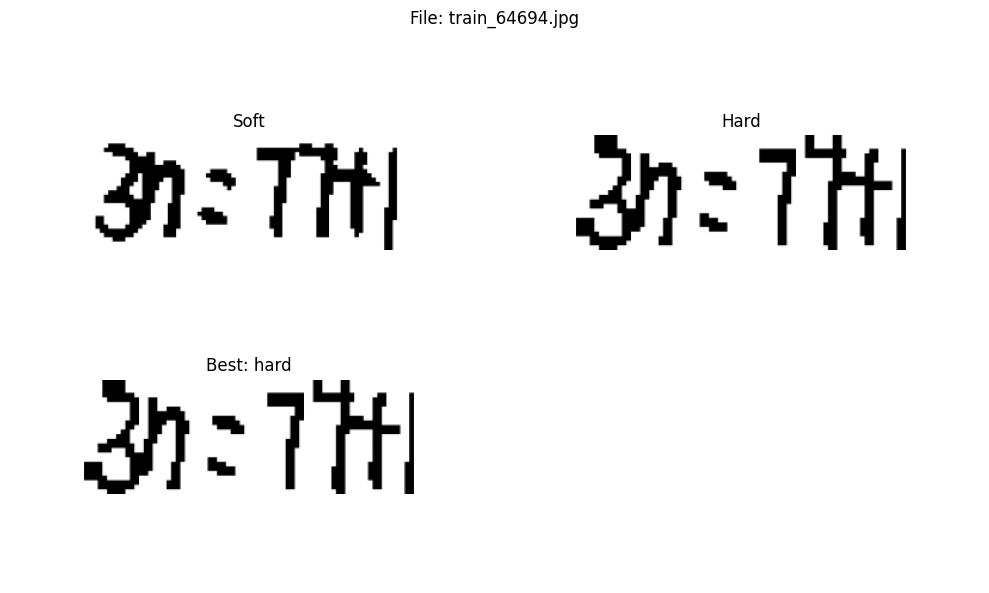

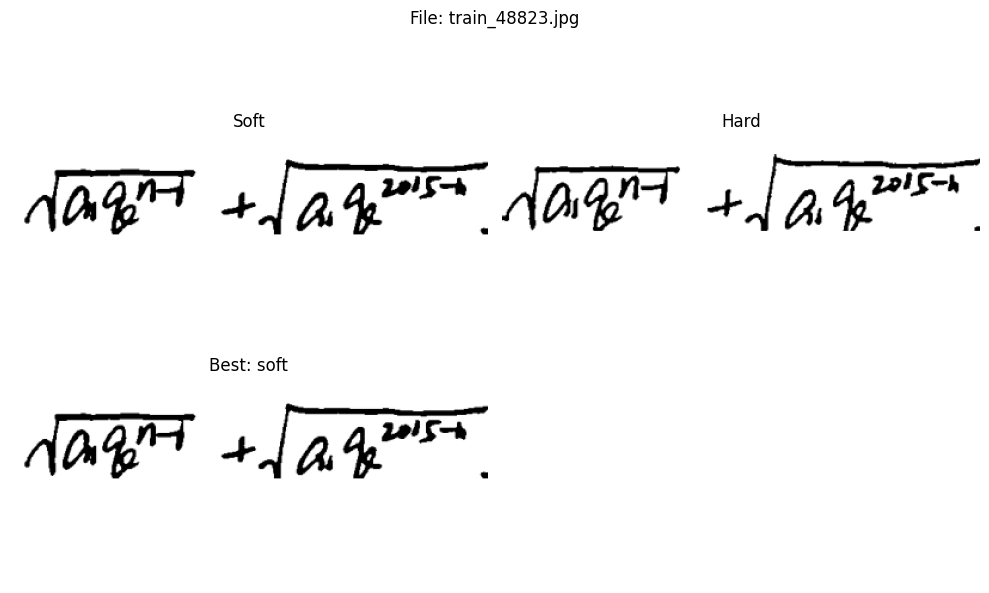

In [3]:
for fpath in sample_files:
    img = cv2.imread(str(fpath))
    
    variants = preprocess_photo_universal(img)
    soft_img = variants['soft']
    hard_img = variants['hard']
    best_img = variants['best']
    best_name = variants['best_name']
    
    fig, axes = plt.subplots(2, 2, figsize=(10,6))
    
    # first row: soft and hard
    axes[0,0].imshow(soft_img, cmap='gray')
    axes[0,0].set_title('Soft')
    axes[0,0].axis('off')
    
    axes[0,1].imshow(hard_img, cmap='gray')
    axes[0,1].set_title('Hard')
    axes[0,1].axis('off')
    
    # second row: best variant
    axes[1,0].imshow(best_img, cmap='gray')
    axes[1,0].set_title(f'Best: {best_name}')
    axes[1,0].axis('off')
    
    axes[1,1].axis('off')
    
    plt.suptitle(f'File: {fpath.name}')
    plt.tight_layout()
    plt.show()